In [165]:
#Importing all the libraries required
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score


In [167]:
# load the data file
pd.set_option('display.max_columns', None)
data = pd.read_csv('youth_data.csv')
data.head()

IRALCFY  IRMJFY  IRCIGFM  IRSMKLSS30N  IRALCFM  IRMJFM  IRCIGAGE  \
0      991     991     91.0           91     91.0    91.0       991   
1      991      60     91.0           91     91.0     2.0       991   
2        1     991     91.0           91     93.0    91.0       991   
3      991     991     91.0           91     91.0    91.0       991   
4      991     991     91.0           91     91.0    91.0       991   

   IRSMKLSSTRY  IRALCAGE  IRMJAGE  MRJFLAG  ALCFLAG  TOBFLAG  ALCYDAYS  \
0          991       991      991        0        0        0         6   
1          991       991       14        1        0        0         6   
2          991        11      991        0        1        0         1   
3          991       991      991        0        0        0         6   
4          991       991      991        0        0        0         6   

   MRJYDAYS  ALCMDAYS  MRJMDAYS  CIGMDAYS  SMKLSMDAYS  SCHFELT  TCHGJOB  \
0         6         5         5         6           5        1      1.0   
1         3         5         1         6           5        2      1.0   
2         6         5         5         6           5        1      1.0   
3         6         5         5         6           5        2      1.0   
4         6         5         5         6           5        1      2.0   

   AVGGRADE  STNDSCIG  STNDSMJ  STNDALC  STNDDNK  PARCHKHW  PARHLPHW  \
0       2.0       2.0      2.0      2.0      2.0       1.0       1.0   
1       2.0       1.0      1.0      1.0      1.0       1.0       1.0   
2       2.0       2.0      2.0      2.0      2.0       1.0       1.0   
3       NaN       2.0      2.0      2.0      2.0       1.0       2.0   
4       2.0       2.0      2.0      2.0      2.0       2.0       1.0   

   PRCHORE2  PRLMTTV2  PARLMTSN  PRGDJOB2  PRPROUD2  ARGUPAR  YOFIGHT2  \
0       1.0       2.0       1.0       1.0       1.0      1.0       2.0   
1       2.0       2.0       1.0       1.0       1.0      1.0       2.0   
2       1.0       1.0       1.0       2.0       1.0      1.0       1.0   
3       2.0       2.0       2.0       1.0       1.0      1.0       2.0   
4       1.0       2.0       2.0       1.0       1.0      2.0       2.0   

   YOGRPFT2  YOHGUN2  YOSELL2  YOSTOLE2  YOATTAK2  PRPKCIG2  PRMJEVR2  PRMJMO  \
0       2.0      2.0      2.0       2.0       2.0       1.0       1.0     1.0   
1       2.0      2.0      2.0       2.0       2.0       1.0       2.0     2.0   
2       1.0      2.0      2.0       2.0       2.0       1.0       1.0     1.0   
3       2.0      2.0      2.0       2.0       2.0       1.0       1.0     1.0   
4       2.0      1.0      2.0       2.0       2.0       1.0       2.0     1.0   

   PRALDLY2  YFLPKCG2  YFLTMRJ2  YFLMJMO  YFLADLY2  FRDPCIG2  FRDMEVR2  \
0       1.0       1.0       1.0      1.0       1.0       1.0       1.0   
1       1.0       1.0       1.0      2.0       1.0       2.0       2.0   
2       1.0       1.0       1.0      1.0       1.0       1.0       1.0   
3       1.0       1.0       1.0      1.0       1.0       1.0       1.0   
4       1.0       1.0       1.0      2.0       2.0       1.0       1.0   

   FRDMJMON  FRDADLY2  TALKPROB  PRTALK3  PRBSOLV2  PREVIOL2  PRVDRGO2  \
0       1.0       1.0       2.0      1.0       1.0       1.0       2.0   
1       2.0       2.0       2.0      1.0       2.0       2.0       2.0   
2       1.0       1.0       2.0      1.0       2.0       2.0       2.0   
3       1.0       1.0       1.0      2.0       2.0       2.0       2.0   
4       1.0       1.0       2.0      2.0       2.0       2.0       2.0   

   GRPCNSL2  PREGPGM2  YTHACT2  DRPRVME3  ANYEDUC3  RLGATTD  RLGIMPT  RLGDCSN  \
0       2.0       2.0      2.0       1.0       1.0      2.0      1.0      1.0   
1       2.0       2.0      1.0       2.0       1.0      2.0      2.0      2.0   
2       2.0       2.0      2.0       1.0       1.0      2.0      1.0      1.0   
3       2.0       2.0      2.0       2.0       2.0      2.0      1.0      1.0   
4       2.0       2.

In [169]:
# Renaming the columns for easy access
column_rename = { 
'IRALCFY':'Alcohol_Frequency_Year', 
'IRMJFY':'Marijuana_Freuency_Year',
'IRCIGFM':'Cigarette_Frequency_Month',
'IRALCFM':'Alcohol_Frequency_Month',
'IRMJFM': 'Marijuana_Frequency_Month',
'IRCIGAGE':'Cigarette_Age_First_Use',
'IRSMKLSSTRY':'Smokeless_Tobacco_First_Use',
'IRALCAGE':'Alcohol_Age_First_Use',
'IRMJAGE':'Marijuana_Age_First_Use',
'MRJFLAG':'Marijuana_Use_Flag', 
'ALCFLAG':'Alcohol_Use_Flag', 
'TOBFLAG':'Tobacco_Use_Flag',
'ALCYDAYS':'Alcohol_Days_last_year',
'MRJYDAYS':'Marijuana_Days_Last_Year',
'ALCMDAYS':'Alcohol_days_Last_month',
'MRJMDAYS':'Marijuana_days_Last_month',
'CIGMDAYS':'Cigarette_days_Last_month',
'PARCHKHW': 'parents_check_homework',
'PARHLPHW': 'parents_help_with_homework',
'PRMJEVR2': 'parents_know_marijuana_use_ever',
'PRMJMO': 'parents_know_marijuana_use_this_month',
'PRLMTTV2': 'parents_limit_tv_time',
'PRPROUD2': 'parents_express_pride',
'PRGDJOB2': 'parents_encourage_good_job',
'PRALDLY2': 'parents_know_alcohol_use',
'YOSELL2': 'youth_sold_illegal_items',
'YOSTOLE2': 'youth_stole_something',
'YOATTAK2': 'youth_attacked_someone',
'YOFIGHT2': 'youth_in_fight',
'YOHGUN2': 'youth_carried_handgun',
'YOGRPFT2': 'youth_in_group_fight',
'SCHFELT': 'feeling_about_school',
'AVGGRADE': 'average_grade',
'ARGUPAR': 'argue_with_parents',
'TALKPROB': 'talk_about_personal_problems',
'PRTALK3': 'talk_with_parents_about_problems',
'PRBSOLV2': 'solve_problems_with_parents',
'FRDMJMON': 'friends_use_marijuana_monthly',
'FRDMEVR2': 'friends_ever_used_marijuana',
'STNDSMJ': 'think_marijuana_is_harmful',
'STNDALC': 'think_alcohol_is_harmful',
'STNDDNK': 'think_binge_drinking_is_harmful',
'RLGIMPT': 'religion_is_important',
'RLGDCSN': 'religion_guides_decisions',
'RLGATTD': 'attend_religious_services',
'RLGFRND': 'friends_share_religious_views',
'FRDADLY2': 'friends_use_alcohol_daily',
'YFLMJMO': 'peer_pressure_marijuana_this_month',
'YFLTMRJ2': 'peer_pressure_marijuana_last_year',
'YFLADLY2': 'peer_pressure_alcohol_daily',
'IRSEX': 'Gender', 
'NEWRACE2':'Race', 
'HEALTH2':'Overall_Health',    
'IMOTHER':'Mother_Presence', 
'IFATHER':'Father_Presence', 
'INCOME':'Total_Income', 
'POVERTY3':'Poverty_Level',
'PDEN10':'Population_Density',
'COUTYP4': 'County_Type' 
}

In [171]:
data.rename(columns=column_rename, inplace=True) 
data.columns 

Index(['Alcohol_Frequency_Year', 'Marijuana_Freuency_Year',
       'Cigarette_Frequency_Month', 'IRSMKLSS30N', 'Alcohol_Frequency_Month',
       'Marijuana_Frequency_Month', 'Cigarette_Age_First_Use',
       'Smokeless_Tobacco_First_Use', 'Alcohol_Age_First_Use',
       'Marijuana_Age_First_Use', 'Marijuana_Use_Flag', 'Alcohol_Use_Flag',
       'Tobacco_Use_Flag', 'Alcohol_Days_last_year',
       'Marijuana_Days_Last_Year', 'Alcohol_days_Last_month',
       'Marijuana_days_Last_month', 'Cigarette_days_Last_month', 'SMKLSMDAYS',
       'feeling_about_school', 'TCHGJOB', 'average_grade', 'STNDSCIG',
       'think_marijuana_is_harmful', 'think_alcohol_is_harmful',
       'think_binge_drinking_is_harmful', 'parents_check_homework',
       'parents_help_with_homework', 'PRCHORE2', 'parents_limit_tv_time',
       'PARLMTSN', 'parents_encourage_good_job', 'parents_express_pride',
       'argue_with_parents', 'youth_in_fight', 'youth_in_group_fight',
       'youth_carried_handgun', 'youth_sold

In [173]:
data.head()

Alcohol_Frequency_Year  Marijuana_Freuency_Year  Cigarette_Frequency_Month  \
0                     991                      991                       91.0   
1                     991                       60                       91.0   
2                       1                      991                       91.0   
3                     991                      991                       91.0   
4                     991                      991                       91.0   

   IRSMKLSS30N  Alcohol_Frequency_Month  Marijuana_Frequency_Month  \
0           91                     91.0                       91.0   
1           91                     91.0                        2.0   
2           91                     93.0                       91.0   
3           91                     91.0                       91.0   
4           91                     91.0                       91.0   

   Cigarette_Age_First_Use  Smokeless_Tobacco_First_Use  \
0                      991                          991   
1                      991                          991   
2                      991                          991   
3                      991                          991   
4                      991                          991   

   Alcohol_Age_First_Use  Marijuana_Age_First_Use  Marijuana_Use_Flag  \
0                    991                      991                   0   
1                    991                       14                   1   
2                     11                      991                   0   
3                    991                      991                   0   
4                    991                      991                   0   

   Alcohol_Use_Flag  Tobacco_Use_Flag  Alcohol_Days_last_year  \
0                 0                 0                       6   
1                 0                 0                       6   
2                 1                 0                       1   
3                 0                 0                       6   
4                 0                 0                       6   

   Marijuana_Days_Last_Year  Alcohol_days_Last_month  \
0                         6                        5   
1                         3                        5   
2                         6                        5   
3                         6                        5   
4                         6                        5   

   Marijuana_days_Last_month  Cigarette_days_Last_month  SMKLSMDAYS  \
0                          5                          6           5   
1                          1                          6           5   
2                          5                          6           5   
3                          5                          6           5   
4                          5                          6           5   

   feeling_about_school  TCHGJOB  average_grade  STNDSCIG  \
0                     1      1.0            2.0       2.0   
1                     2      1.0            2.0       1.0   
2                     1      1.0            2.0       2.0   
3                     2      1.0            NaN       2.0   
4                     1      2.0            2.0       2.0   

   think_marijuana_is_harmful  think_alcohol_is_harmful  \
0                         2.0                       2.0   
1                         1.0                       1.0   
2                         2.0                       2.0   
3                         2.0                       2.0   
4                         2.0                       2.0   

   think_binge_drinking_is_harmful  parents_check_homework  \
0                              2.0                     1.0   
1                              1.0                     1.0   
2                              2.0                     1.0   
3                              2.0                     1.0   
4                              2.0                     2.0   

   parents_help_with_homework  PRCHORE2  parents_li

In [175]:
#Function to retrieve unique values in each row
def uniqueColumns(data):
    for col in data.columns:
        print(f"'{col}':{data[col].unique()}")

If we see the data there are null values in the data related to youth experience question so we need to remove nan values from those columns.

In [178]:
# Features were chosen from peer influence, parental involvement, behavioral risks, school engagement, and religious orientation based on relevant features and correlation strength with the target variable.

selected_features = [
    'friends_use_marijuana_monthly',
    'friends_ever_used_marijuana',
    'friends_use_alcohol_daily',
    'peer_pressure_marijuana_this_month',
    'peer_pressure_marijuana_last_year',
    'peer_pressure_alcohol_daily',
    'parents_check_homework',
    'parents_help_with_homework',
    'parents_know_marijuana_use_ever',
    'parents_know_marijuana_use_this_month',
    'parents_limit_tv_time',
    'parents_express_pride',
    'parents_encourage_good_job',
    'parents_know_alcohol_use',
    'youth_sold_illegal_items',
    'youth_stole_something',
    'youth_attacked_someone',
    'youth_in_fight',
    'youth_carried_handgun',
    'youth_in_group_fight',
    'feeling_about_school',
    'average_grade',
    'argue_with_parents',
    'talk_about_personal_problems',
    'talk_with_parents_about_problems',
    'solve_problems_with_parents',
    'think_marijuana_is_harmful',
    'think_alcohol_is_harmful',
    'think_binge_drinking_is_harmful',
    'religion_is_important',
    'religion_guides_decisions',
    'attend_religious_services',
    'friends_share_religious_views']


In [180]:
#Removing nan values from the youth experience data
youth_data = data.loc[:, selected_features]
data.dropna(subset = youth_data.columns, inplace = True)

In [182]:
data.dropna(subset = ['Overall_Health'], inplace = True)

In [184]:
#Cleaning the demographic details
#The 'EDUSCHGRD2' column has values 98,99 which indicates blank/skip so we can remove that data.
# The 'EDUSKPCOM' column has values 94,97,98,99 which indicates blank/skip so removing that data.
# The 'IMOTHER' or 'IFATHER' column has value 3 which mean the response is don't know so dropping the columns.
data = (
    data[~data['EDUSCHGRD2'].isin([98, 99])][~data['EDUSKPCOM'].isin([94, 97, 98, 99])][data['Population_Density'] != 3][data['Mother_Presence'] != 3]
    [data['Father_Presence'] != 3]

).reset_index(drop=True)

/var/folders/y4/fkn560k16c3__twnyy0m4jxr0000gn/T/ipykernel_54459/2527575588.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[~data['EDUSCHGRD2'].isin([98, 99])][~data['EDUSKPCOM'].isin([94, 97, 98, 99])][data['Population_Density'] != 3][data['Mother_Presence'] != 3]
/var/folders/y4/fkn560k16c3__twnyy0m4jxr0000gn/T/ipykernel_54459/2527575588.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[~data['EDUSCHGRD2'].isin([98, 99])][~data['EDUSKPCOM'].isin([94, 97, 98, 99])][data['Population_Density'] != 3][data['Mother_Presence'] != 3]
/var/folders/y4/fkn560k16c3__twnyy0m4jxr0000gn/T/ipykernel_54459/2527575588.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[~data['EDUSCHGRD2'].isin([98, 99])][~data['EDUSKPCOM'].isin([94, 97, 98, 99])][data['Population_Density'] != 3][data['Mother_Presence'] != 3]
/var/folders/y4/fkn560k16c3__twnyy0m4jxr0000gn/T/ipykernel_54459/2527575588.py:

In [186]:
# labeling the codes for fewquency of marijuana use
mrjydays_labels = {
    1: 'Rarely',
    2: 'Occasionally',
    3: 'Sometimes',
    4: 'Frequently',
    5: 'Almost Daily',
    6: 'No Past Year Use'
}

In [188]:
#One hot encoding for the categorical variables
data['Race'] = data['Race'].astype(str)

data = pd.get_dummies(data, columns = ['Race'])

race_rename_dict = {
    'Race_1': 'White',
    'Race_2': 'Black',
    'Race_3': 'Native American',
    'Race_4': 'Pacific Islander',
    'Race_5': 'Asian',
    'Race_6': 'Mixed Race',
    'Race_7': 'Hispanic'
}

data.rename(columns = race_rename_dict, inplace = True)


In [190]:
data.shape

(5932, 85)

In [192]:
uniqueColumns(data)

'Alcohol_Frequency_Year':[991   1 993   2   3  13  12   4   5   6 104  25  52  60  36 134 168  17
  24  84  72  48  14  20 245  49  15 240  10   8   7  11  37  26 246 120
  96 180 156  31  50  30   9  16  21 208  55  29  54  32  27  38  18  81
 108 260  46  22  35  40  19 144  73  28 112 175  56 339  42 100 312  86
  67]
'Marijuana_Freuency_Year':[991  60 240   8  36   2 150 993   7  37  12  24   9  58  52 156   6  67
  35  48   1 120  13 130 365 208  96  72  25 104 127   4   5   3 168 260
 110  27 364 179  20  34 355 144  90  29 180 108 312 288  84  46 128  56
 353  23  28  30  18 135  16 363 155  10 105  40  85  11  47  15  45 250
 358 252 300  98 320  21 264  31  19 184 342  17 336 348  22 136  68 230
 261  38 362  51  97  43  14  78  50  42  69 100  32 350  99  33 206 340
  93]
'Cigarette_Frequency_Month':[91. 93.  1.  3.  2. 10.  7. 30.  4. 25. 15. 13. 20.  5.  8. 23.  6.]
'IRSMKLSS30N':[91 93  3  4 20 30  1 15  2  5  7 18]
'Alcohol_Frequency_Month':[91.  93.   1.   2.   3.   5.  

In [194]:
# Youth experiences data
youth_data = data.loc[:, selected_features]

#demographic details
demographic_data = data.loc[:, 'Gender':'County_Type']

#concatinating both dataframes to a single dataframe and considered as input features.
X = pd.concat([youth_data, demographic_data], axis=1)

# target variable 'Alcohol_Use_Flag'
Y = data.loc[:,'Marijuana_Use_Flag']

In [196]:
X.shape

(5932, 45)

## Binary Classification

This is to classify whether the youth use marijuana or not. The features used are youth demographic details, youth experiences data.

#### Method1: Decision Tree Classifier

In [201]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [203]:
#Fitting the decision tree classifier
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

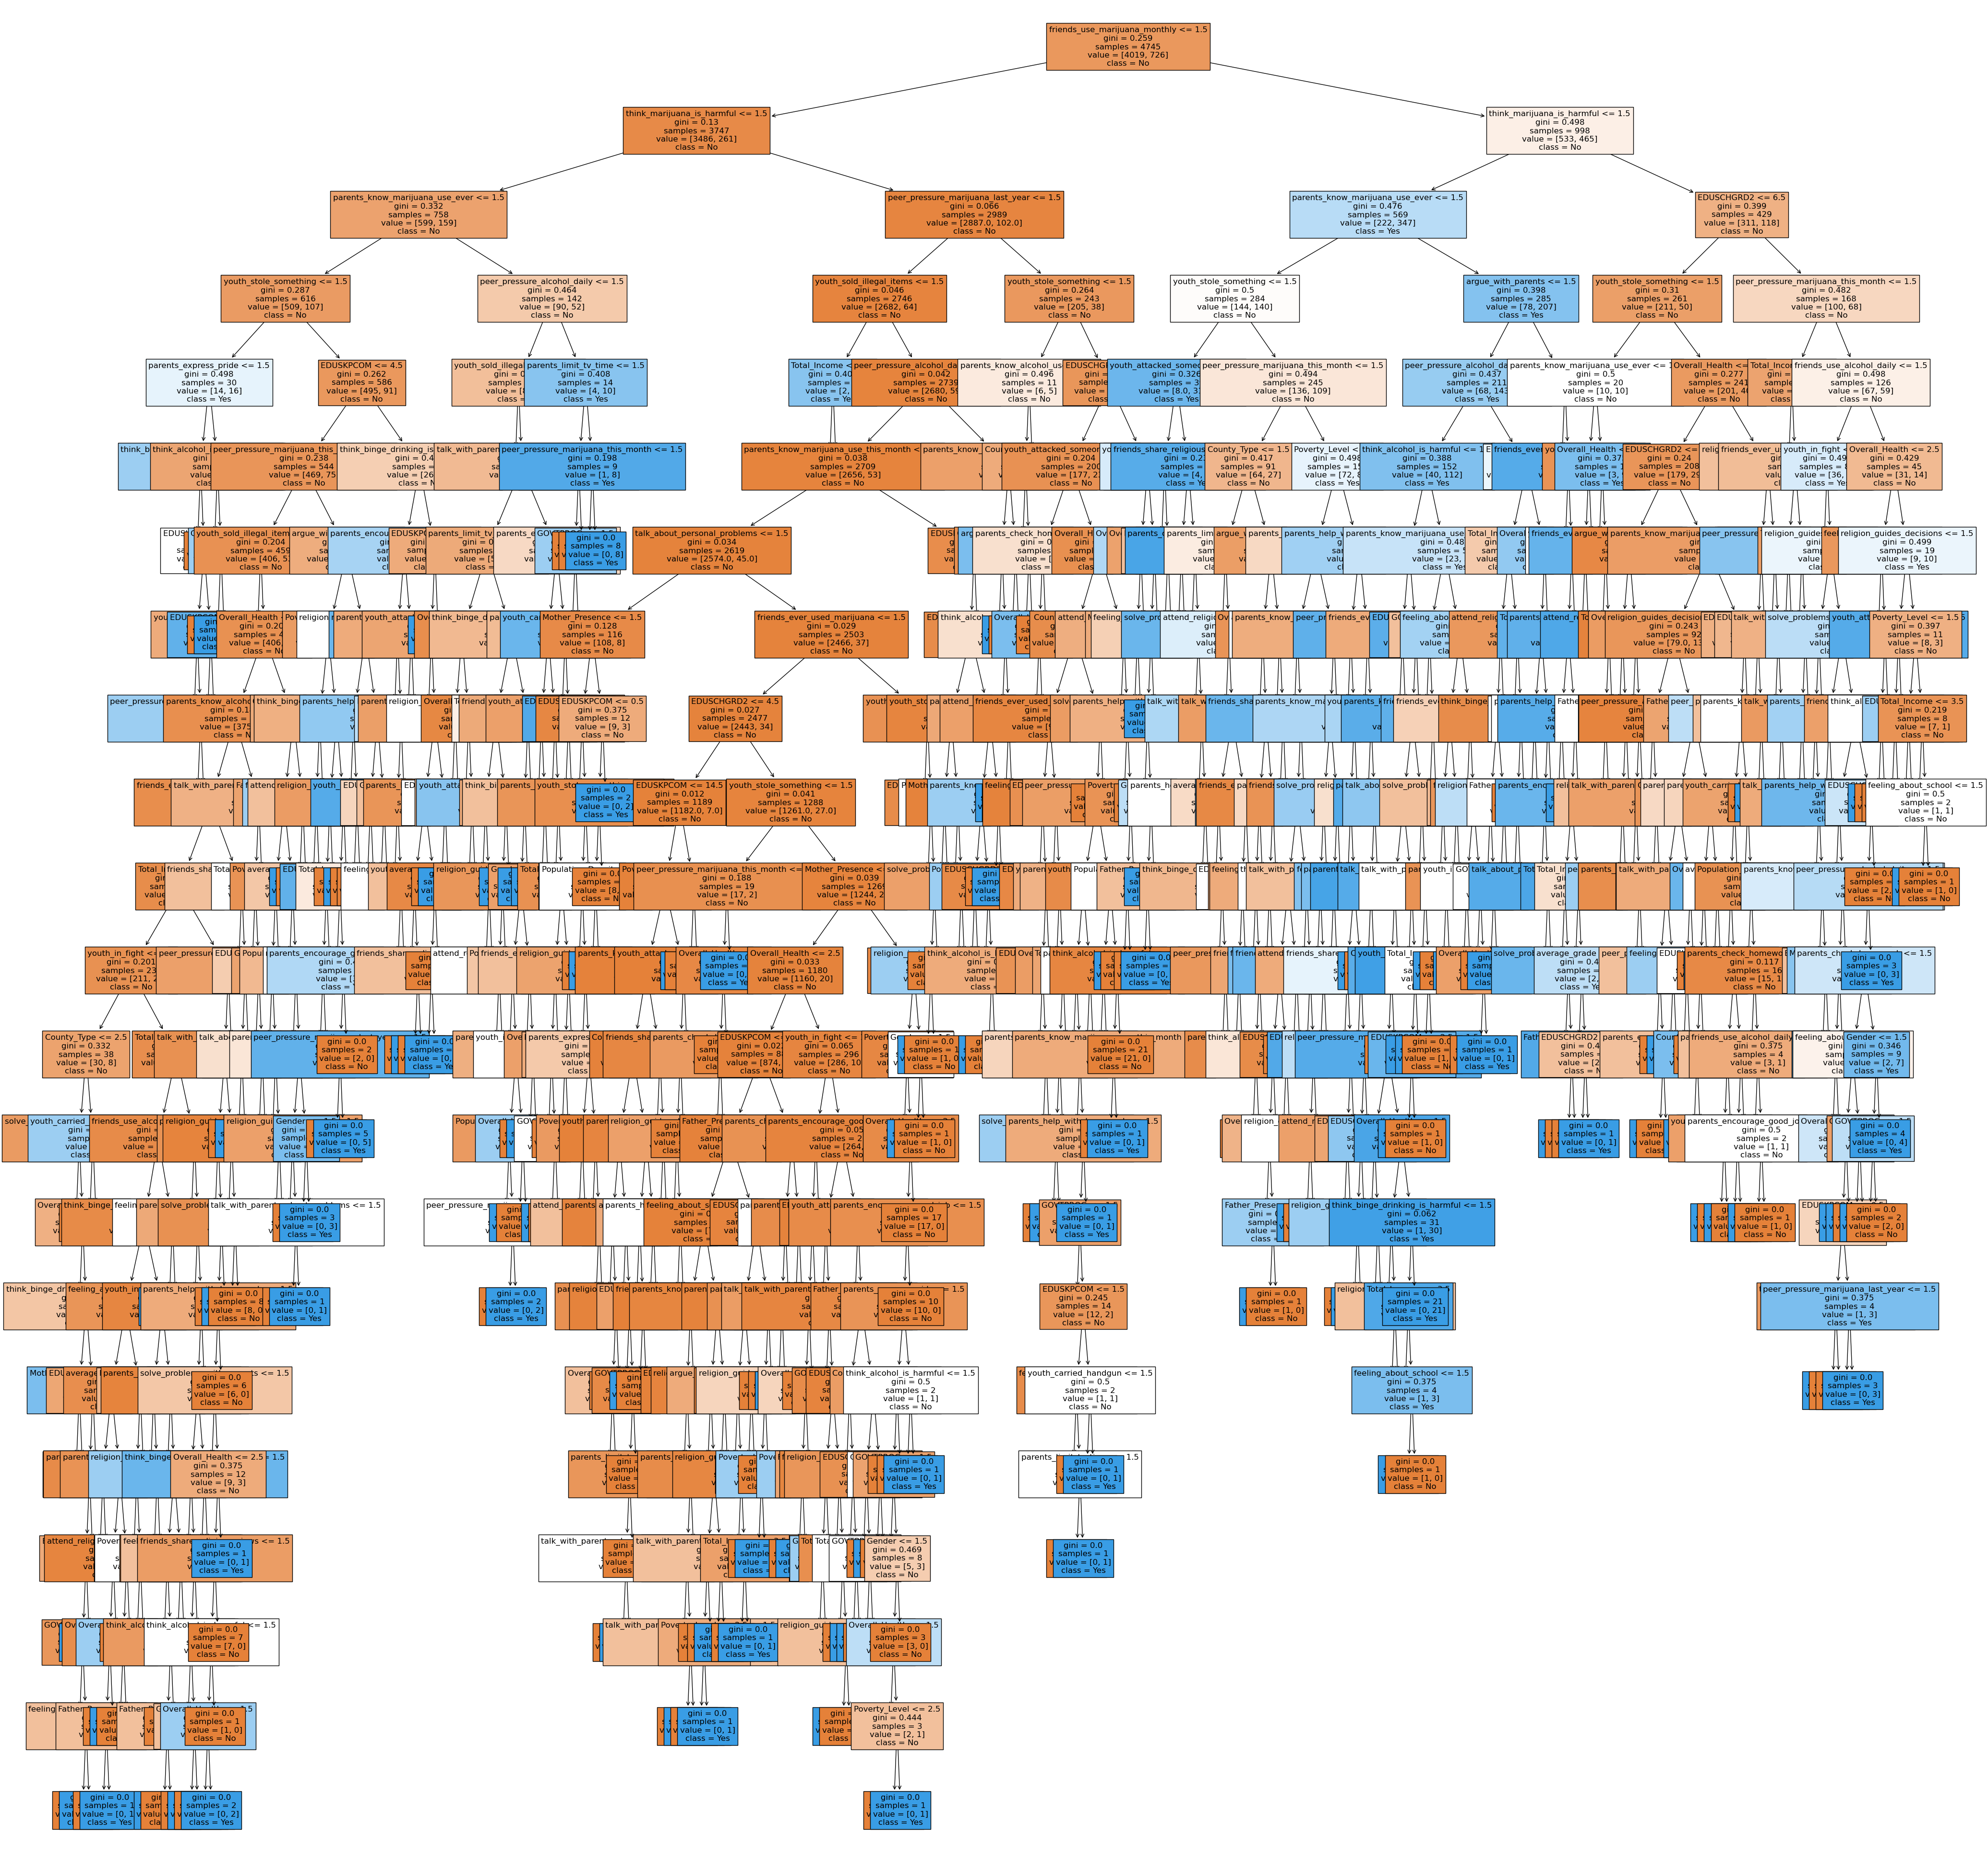

In [205]:
# plotting the decision tree
plt.figure(figsize=(50,50))
plot_tree(tree
          , filled=True
          , feature_names=X.columns
          , class_names=['No', 'Yes']
          , label='all'
          , fontsize=12)
plt.show()

In [207]:
# Evaluating the accuracy score for test data
y_pred = tree.predict(X_test)
accuracy = tree.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
print("Accuracy of decision tree model: {:.2f}%".format(accuracy*100))
print(f"Precision for decision tree model: {precision:.2f}")
print(f"Recall for decision tree model: {recall:.2f}")

Accuracy of decision tree model: 84.67%
Precision for decision tree model: 0.46
Recall for decision tree model: 0.47


In [209]:
#Variable importance
importances = pd.DataFrame({'feature_name': X.columns, 'importance': tree.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0    friends_use_marijuana_monthly    0.201259
1       think_marijuana_is_harmful    0.074915
2                       EDUSCHGRD2    0.060941
3                   Overall_Health    0.046729
4                        EDUSKPCOM    0.045649
5                     Total_Income    0.036332
6  parents_know_marijuana_use_ever    0.028032
7        religion_guides_decisions    0.027927
8                    Poverty_Level    0.023860
9             feeling_about_school    0.022717

#### PRUNING

The optimal tree size: 11


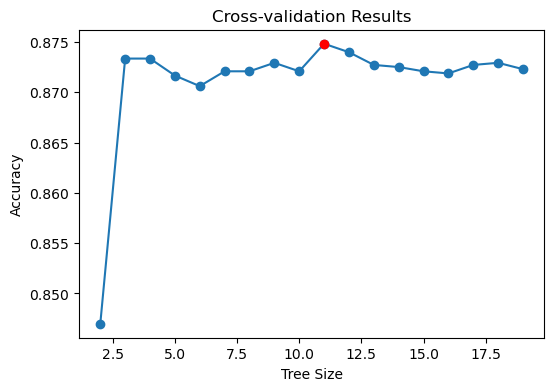

In [212]:
# cross-validation to determine optimal tree size
params = {'max_leaf_nodes': range(2, 20)}  
cv_tree = GridSearchCV(tree, params, cv=5)
cv_tree.fit(X_train, y_train)
cv_results = cv_tree.cv_results_

# find the best score for max leaf nodes
best_size = cv_tree.best_params_['max_leaf_nodes']
best_score = cv_tree.best_score_

# plot results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');
print('The optimal tree size:',best_size)


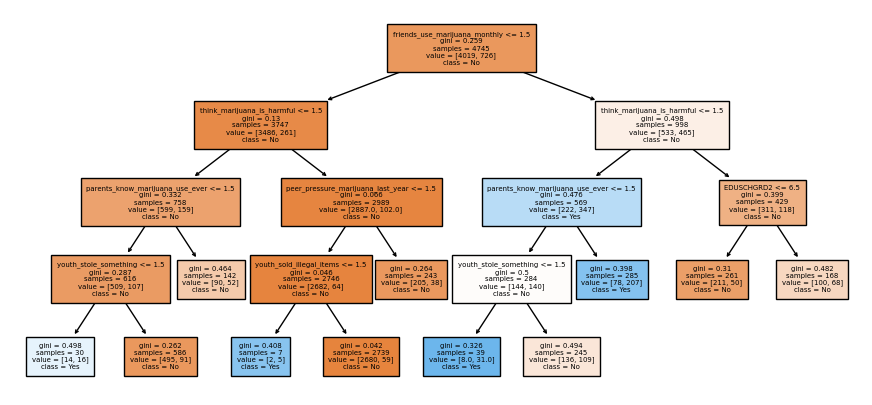

In [214]:
# prune tree using optimal size
prune_tree = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=7)
prune_tree.fit(X_train, y_train)

# plot pruned tree
plt.figure(figsize=(11,5))
plt.title('Pruned Tree')
plot_tree(prune_tree, feature_names=X_train.columns, filled=True, fontsize = 5,class_names = ['No','Yes']);

In [216]:
prune_tree.classes_

array([0, 1])

In [218]:
# Calculate the accuracy of the decision tree on the test data
y_pred = prune_tree.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy_pr = prune_tree.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy_pr*100))
print(f"Precision for pruned tree: {precision:.2f}")
print(f"Recall for pruned tree: {recall:.2f}")

Accuracy: 87.87%
Precision for pruned tree: 0.64
Recall for pruned tree: 0.32


#### Bagging

In [221]:
#Using random forest classier for the train data
Tree_bagging = RandomForestClassifier(max_features=X_train.shape[1],random_state = 1)
Tree_bagging.fit(X_train,y_train)

RandomForestClassifier(max_features=45, random_state=1)

In [223]:
#Now the test data is predicted using the Bagging model
y_pred_bag = Tree_bagging.predict(X_test)
# Calculate the accuracy of the bagging model on the test data
accuracy_bag = Tree_bagging.score(X_test, y_test)
precision = precision_score(y_test, y_pred_bag)
recall = recall_score(y_test, y_pred_bag)
print("Accuracy: {:.2f}%".format(accuracy_bag*100))
print(f"Precision for Bagging model: {precision:.2f}")
print(f"Recall for Bagging model: {recall:.2f}")

Accuracy: 87.28%
Precision for Bagging model: 0.57
Recall for Bagging model: 0.40


In [225]:
#variable importance with the selected features
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_bagging.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0       friends_use_marijuana_monthly    0.191064
1          think_marijuana_is_harmful    0.075085
2                          EDUSCHGRD2    0.058547
3                           EDUSKPCOM    0.042071
4                      Overall_Health    0.041423
5                        Total_Income    0.032946
6  peer_pressure_marijuana_this_month    0.029981
7     parents_know_marijuana_use_ever    0.025209
8                         County_Type    0.024629
9               youth_stole_something    0.023422

In [227]:
#Knowing number of trees and number of predictors used for each split
print("Number of trees:", Tree_bagging.n_estimators)
print("Number of features tried at each split:",Tree_bagging.max_features)

Number of trees: 100
Number of features tried at each split: 45


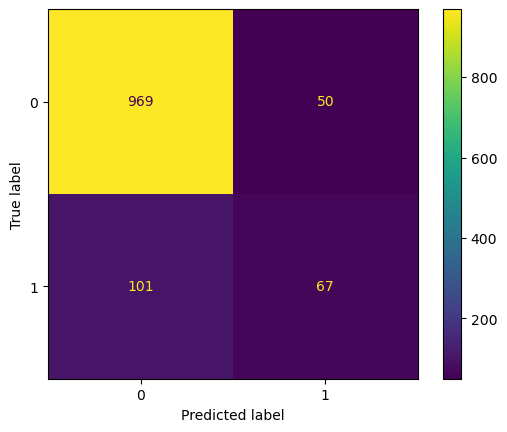

In [229]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bag)

#### Random Forest

In [232]:
# Building random forest model by randomly selecting 23 features in each split.
Tree_random = RandomForestClassifier(max_features=23,random_state = 1)
Tree_random.fit(X_train,y_train)

#predictuing the test data using random forest model
y_pred_bag = Tree_random.predict(X_test)

# Calculate the accuracy of the random forest model on the test data
accuracy_rf = Tree_random.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy_rf*100))
precision = precision_score(y_test, y_pred_bag)
recall = recall_score(y_test, y_pred_bag)
print(f"Precision for RandomForest Model: {precision:.2f}")
print(f"Recall for RandomForest Model: {recall:.2f}")

Accuracy: 87.95%
Precision for RandomForest Model: 0.61
Recall for RandomForest Model: 0.40


In [234]:
#Variable importance
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_random.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0       friends_use_marijuana_monthly    0.119828
1          think_marijuana_is_harmful    0.062113
2  peer_pressure_marijuana_this_month    0.058877
3                          EDUSCHGRD2    0.058200
4         friends_ever_used_marijuana    0.046702
5                           EDUSKPCOM    0.042993
6                      Overall_Health    0.041545
7                        Total_Income    0.030683
8     parents_know_marijuana_use_ever    0.024206
9               youth_stole_something    0.024079

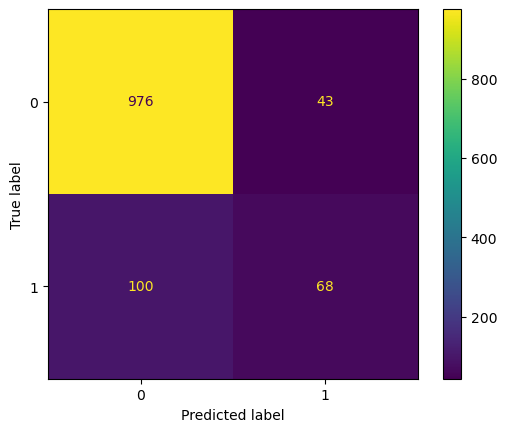

In [236]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bag)

#### Boosting

In [239]:
#Defining parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
}

# Create Boosting model
gb_model = GradientBoostingClassifier(random_state=1)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 150}


In [241]:
# Building model using best paramaters
Tree_Boosting = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'], learning_rate=grid_search.best_params_['learning_rate'], max_depth=4, random_state=1)
Tree_Boosting.fit(X_train,y_train)

#predicting the test data using the random forest model
y_pred = Tree_Boosting.predict(X_test)
accuracy_bst = Tree_Boosting.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy_bst*100))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision for RandomForest Model: {precision:.2f}")
print(f"Recall for RandomForest Model: {recall:.2f}")

Accuracy: 88.29%
Precision for RandomForest Model: 0.63
Recall for RandomForest Model: 0.42


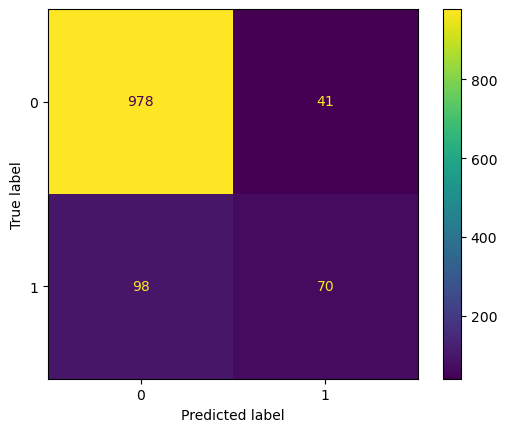

In [243]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Text(0.5, 1.0, 'Variable importance for Boosting model')

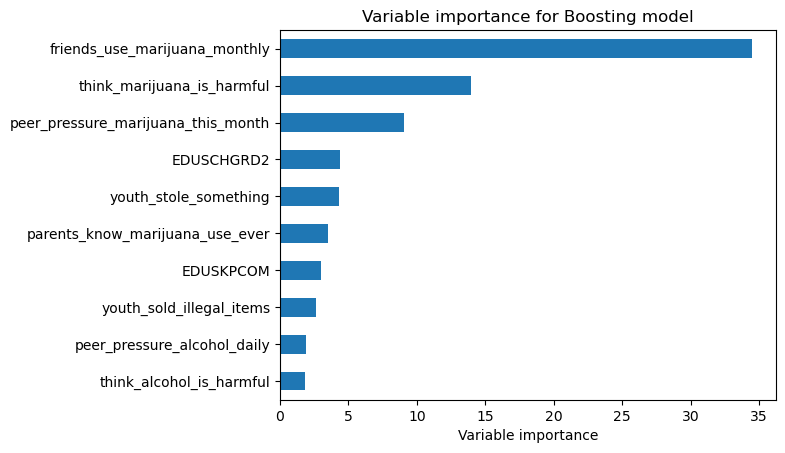

In [245]:
# Plotting the variable importance for boosting model
feature_importance = Tree_Boosting.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable importance for Boosting model')

## Multi-Class Classification

This involves predicting number of days of marijuana use in the past year. Our target feature is 'Marijuana_Days_Last_Year'\
1 = 1-11 Days - Rarely
2 = 12-49 Days - Occasionally
3 = 50-99 Days - Sometimes
4 = 100-299 Days - Frequently
5 = 300-365 Days - Almost daily
6 = No Past Year Use 

In [249]:

youth_data = data.loc[:, selected_features]

#demographic details
demographic_data = data.loc[:, 'Gender':'County_Type']

#concatinating both dataframes to a single dataframe and considered as input features.
X = pd.concat([youth_data, demographic_data], axis=1)
data['Marijuana_Days_Last_Year_Levels'] = data['Marijuana_Days_Last_Year'].map(mrjydays_labels)
# target variable 'Alcohol_Use_Flag'
Y = data.loc[:,'Marijuana_Days_Last_Year_Levels']

In [251]:
Y.value_counts()

Marijuana_Days_Last_Year_Levels
No Past Year Use    5187
Rarely               245
Occasionally         189
Frequently           180
Sometimes             75
Almost Daily          56
Name: count, dtype: int64

In [253]:
#Splitting the data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [273]:
#Fitting the decision tree classifier
tree_m = DecisionTreeClassifier(random_state = 1)
tree_m.fit(X_train, y_train)
y_pred = tree_m.predict(X_test)

#finding the accuracy of the descision tree on test data
accuracy = tree_m.score(X_test, y_test)
print("Accuracy of decision tree model: {:.2f}%".format(accuracy*100))
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision for decision tree model: {precision:.2f}")
print(f"Recall for decision tree model: {recall:.2f}")

Accuracy of decision tree model: 81.07%
Precision for decision tree model: 0.81
Recall for decision tree model: 0.81


In [275]:
importances = pd.DataFrame({'feature_name': X.columns, 'importance': tree_m.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0  friends_use_marijuana_monthly    0.102709
1                     EDUSCHGRD2    0.065365
2                      EDUSKPCOM    0.046552
3                 Overall_Health    0.044682
4     think_marijuana_is_harmful    0.040130
5                   Total_Income    0.039389
6                  Poverty_Level    0.032346
7                Father_Presence    0.029427
8                    County_Type    0.027909
9                 youth_in_fight    0.024627

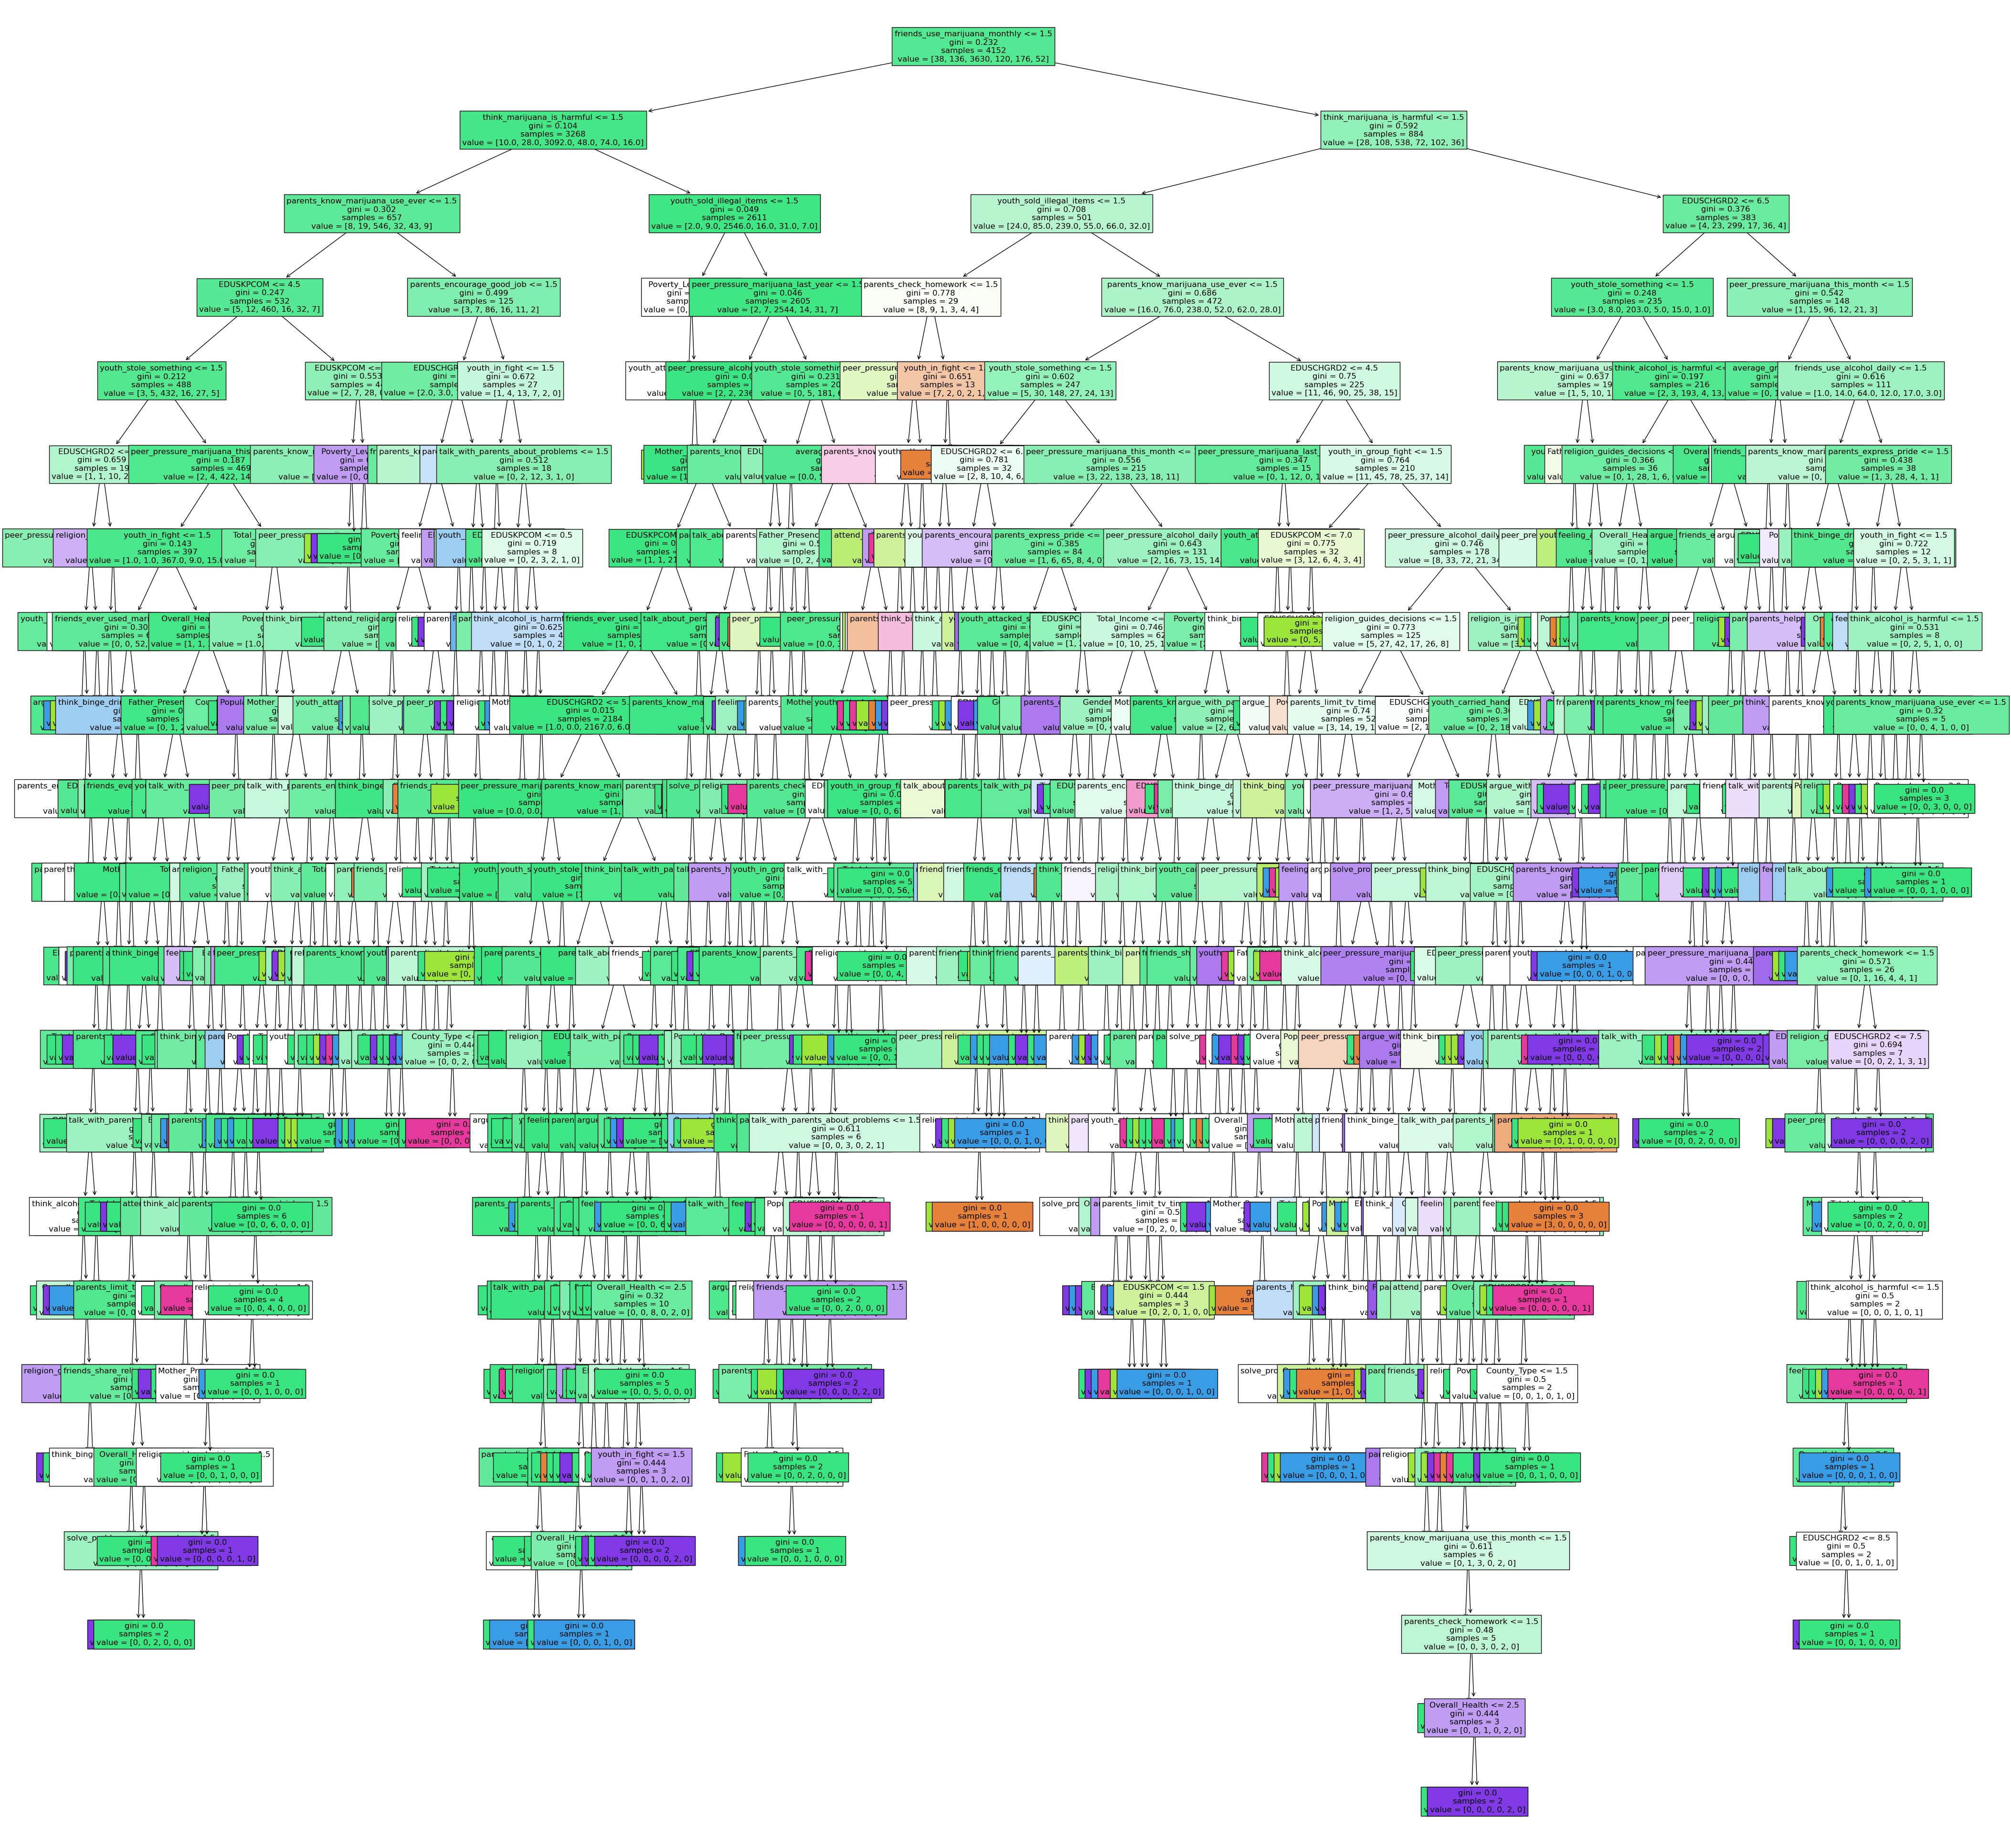

In [277]:
plt.figure(figsize=(50,50))
plot_tree(tree_m
          , filled=True
          , feature_names=X.columns
          , label='all'
          , fontsize=12)
plt.show()

### Pruning

The optimal tree size: 2


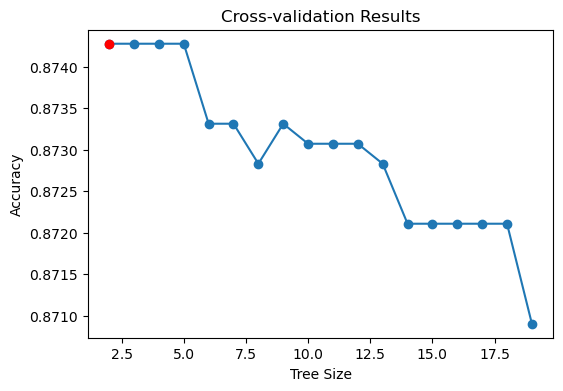

In [279]:
# cross-validation to determine optimal tree size
params = {'max_leaf_nodes': range(2, 20)}  
cv_tree_m = GridSearchCV(tree_m, params, cv=5)
cv_tree_m.fit(X_train, y_train)
cv_results_m = cv_tree_m.cv_results_

# find the best score for max leaf nodes
best_size = cv_tree_m.best_params_['max_leaf_nodes']
best_score = cv_tree_m.best_score_

# plot results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results_m["param_max_leaf_nodes"], cv_results_m["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');
print('The optimal tree size:',best_size)

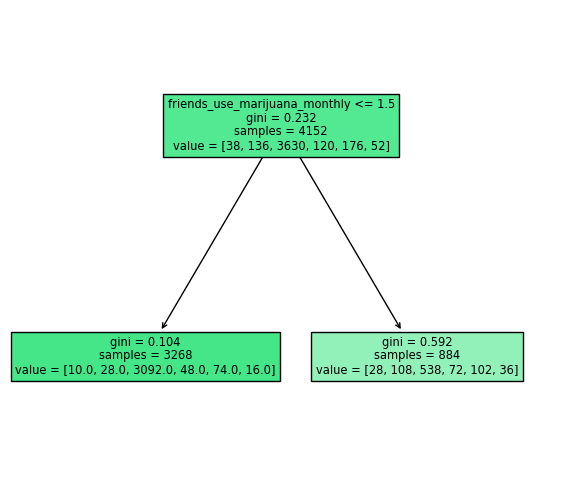

In [281]:
# prune tree using optimal size
prune_tree_m = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=7)
prune_tree_m.fit(X_train, y_train)

# plot pruned tree
plt.figure(figsize=(7,6))
plt.title('Pruned Tree')
plot_tree(prune_tree_m, feature_names=X_train.columns, filled=True);

In [283]:
prune_tree_m.classes_

array(['Almost Daily', 'Frequently', 'No Past Year Use', 'Occasionally',
       'Rarely', 'Sometimes'], dtype=object)

In [287]:
#Finding the accuracy of classification model for test data
accuracy_tree_m = prune_tree_m.score(X_test,y_test)
print("Accuracy of the pruned tree in multi-class classifcation:",accuracy_tree_m)
y_pred = prune_tree_m.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision for decision tree model: {precision:.2f}")
print(f"Recall for decision tree model: {recall:.2f}")

Accuracy of the pruned tree in multi-class classifcation: 0.8747191011235955
Precision for decision tree model: 0.77
Recall for decision tree model: 0.87


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [289]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': prune_tree_m.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(10)

feature_name  importance
0    friends_use_marijuana_monthly         1.0
1     talk_about_personal_problems         0.0
2      solve_problems_with_parents         0.0
3       think_marijuana_is_harmful         0.0
4         think_alcohol_is_harmful         0.0
5  think_binge_drinking_is_harmful         0.0
6            religion_is_important         0.0
7        religion_guides_decisions         0.0
8        attend_religious_services         0.0
9    friends_share_religious_views         0.0

[Text(0, 0, 'Almost Daily'),
 Text(1, 0, 'Frequently'),
 Text(2, 0, 'No Past Year Use'),
 Text(3, 0, 'Occasionally'),
 Text(4, 0, 'Rarely'),
 Text(5, 0, 'Sometimes')]

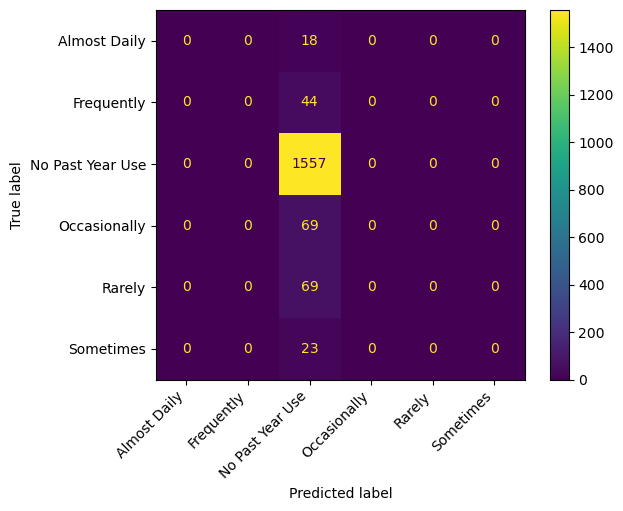

In [291]:
#Predict the test data using pruned tree
y_pred = prune_tree_m.predict(X_test)
disp=ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_xticklabels(disp.display_labels, rotation=45, ha='right')

In [293]:
X_test.shape

(1780, 45)

If we see the above heatmap due to imbalance in the trained data the model is trying to predict by default 'No Past Year Use' to boost the accuracy. Therefore the optimal tree size choosen by the cross validation is 2.

### Bagging

In [297]:
# Bulding bagging model with all the predictor included
Tree_m_bagging = RandomForestClassifier(max_features=X_train.shape[1],random_state = 1)
Tree_m_bagging.fit(X_train,y_train)

# Finding the accuracy score for test data
Accuracy_bag = Tree_m_bagging.score(X_test, y_test)
print("The accuracy of the bagging model for multi-class classification:",Accuracy_bag)
y_pred = Tree_m_bagging.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

The accuracy of the bagging model for multi-class classification: 0.8685393258426967
Precision: 0.79
Recall: 0.87


In [299]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_m_bagging.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0  friends_use_marijuana_monthly    0.088377
1                     EDUSCHGRD2    0.067292
2                      EDUSKPCOM    0.053887
3                 Overall_Health    0.050001
4     think_marijuana_is_harmful    0.039060

### Random Forest

In [304]:
#Building random forest classifier with 23 features selected out of all
Tree_m_rf = RandomForestClassifier(max_features=23,random_state = 1)
Tree_m_rf.fit(X_train,y_train)

#Finding the accuracy score for test data
Accuracy_rf = Tree_m_rf.score(X_test, y_test)
print("The accuracy of the bagging model for multi-class classification:",Accuracy_rf)


The accuracy of the bagging model for multi-class classification: 0.8713483146067416


Precision: 0.80
Recall: 0.87


[Text(0, 0, 'Almost Daily'),
 Text(1, 0, 'Frequently'),
 Text(2, 0, 'No Past Year Use'),
 Text(3, 0, 'Occasionally'),
 Text(4, 0, 'Rarely'),
 Text(5, 0, 'Sometimes')]

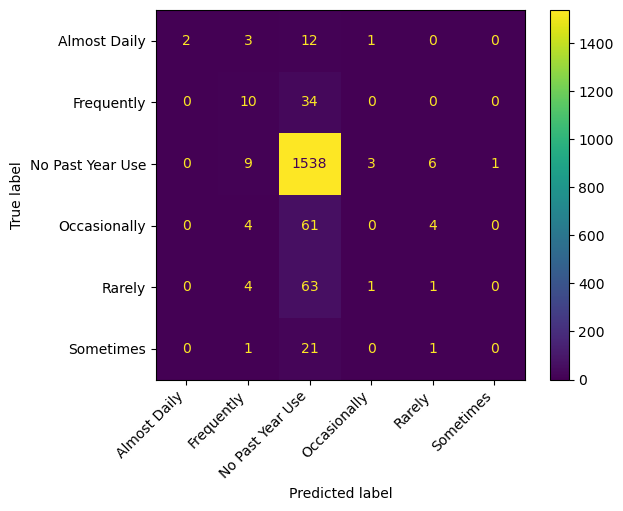

In [305]:
#Predict test data using random forest model
y_pred = Tree_m_rf.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
disp=ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_xticklabels(disp.display_labels, rotation=45, ha='right')

In [308]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_m_rf.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0                          EDUSCHGRD2    0.064453
1       friends_use_marijuana_monthly    0.060955
2                           EDUSKPCOM    0.052276
3                      Overall_Health    0.049666
4  peer_pressure_marijuana_this_month    0.041382

### Boosting

In [311]:
#Defining parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
}

# Create model
gb_model = GradientBoostingClassifier(random_state=1)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 150}


In [313]:
#Building boosting model with best parameters
Tree_Bst_m = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'], learning_rate=grid_search.best_params_['learning_rate'], max_depth=4, random_state=1)
Tree_Bst_m.fit(X_train,y_train)

# Predict the test data using boosting model
y_pred = Tree_Bst_m.predict(X_test)
accuracy_bst = Tree_Bst_m.score(X_test, y_test)
print("The accuracy of the bagging model for multi-class classification:",accuracy_bst)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

The accuracy of the bagging model for multi-class classification: 0.8769662921348315
Precision: 0.82
Recall: 0.88


[Text(0, 0, 'Almost Daily'),
 Text(1, 0, 'Frequently'),
 Text(2, 0, 'No Past Year Use'),
 Text(3, 0, 'Occasionally'),
 Text(4, 0, 'Rarely'),
 Text(5, 0, 'Sometimes')]

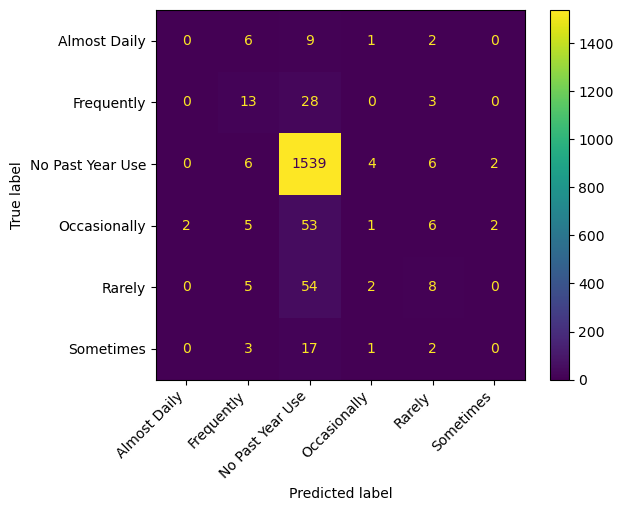

In [315]:
disp=ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_xticklabels(disp.display_labels, rotation=45, ha='right')

Text(0.5, 1.0, 'Variable Importance plot for Boosting model')

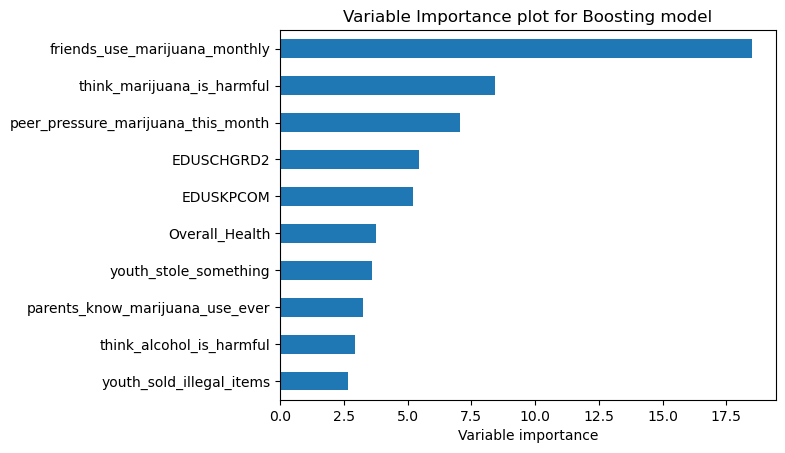

In [317]:
feature_importance = Tree_Bst_m.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable Importance plot for Boosting model')

## Regression

This involves predicting the age of first marijuana use. Our target feature is 'Marijuana_Age_First_Use'.

In [321]:
#Removing the never used(991) values from the column
data = data[data['Marijuana_Age_First_Use'] != 991]

In [323]:
youth_data = data.loc[:, selected_features]

#demographic details
demographic_data = data.loc[:, 'Gender':'County_Type']
#concatinating both dataframes to a single dataframe and considered as input features.
X = pd.concat([youth_data, demographic_data], axis=1)

# target variable 'Marijuana_Age_First_Use'
Y = data.loc[:,'Marijuana_Age_First_Use']


In [787]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size =0.3, random_state = 1)

In [789]:
y_test.shape

(269,)

In [791]:
# Building decision tree regressor for train data
Tree_reg = DecisionTreeRegressor(random_state = 1)
Tree_reg.fit(X_train, y_train)

#Predict the test data using decision tree regressor
y_pred_reg = Tree_reg.predict(X_test)
test_mse = ((y_test - y_pred_reg)**2).mean()
print("Mean squared error for the Decision tree for test set:",test_mse)

Mean squared error for the Decision tree for test set: 5.449814126394052


In [793]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_reg.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0             EDUSCHGRD2    0.237909
1                   Race    0.054092
2  youth_carried_handgun    0.051941
3            County_Type    0.047749
4           Total_Income    0.044701

### Pruning

The optimal tree size: 3


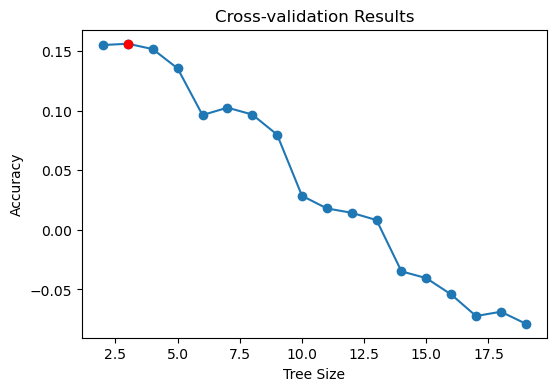

In [796]:
params = {'max_leaf_nodes': range(2, 20)}  
cv_tree_reg = GridSearchCV(Tree_reg, params, cv=5)
cv_tree_reg.fit(X_train, y_train)
cv_results = cv_tree_reg.cv_results_

# find the best score for max leaf nodes
best_size = cv_tree_reg.best_params_['max_leaf_nodes']
best_score = cv_tree_reg.best_score_

# plot results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results');
print('The optimal tree size:',best_size)

In [798]:
#pruning the tree with the best parameters evaluated using cross validation
prune_tree_reg = DecisionTreeRegressor(max_leaf_nodes = best_size, random_state = 1)
prune_tree_reg.fit(X_train, y_train)

# predict the test data using pruned tree
y_pred = prune_tree_reg.predict(X_test)

#Evaluating the mse for test data
test_mse = ((y_test - y_pred)**2).mean()
print("Mean squared error for the pruned tree for test set:",test_mse)

Mean squared error for the pruned tree for test set: 2.171226959275316


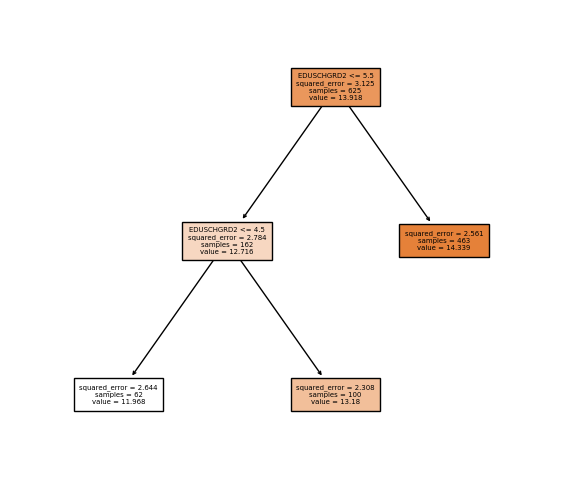

In [800]:
plt.figure(figsize=(7,6))
plt.title('Pruned Tree')
plot_tree(prune_tree_reg, feature_names=X_train.columns, filled=True, fontsize = 5);

In [742]:
X_test.shape

(1187, 46)

### Bagging

In [366]:
#Building bagging model using train data
Tree_reg_bag = RandomForestRegressor(max_features=X_train.shape[1],random_state = 1)
Tree_reg_bag.fit(X_train,y_train)

#Predicting test data using the bagging model
y_pred_bag = Tree_reg_bag.predict(X_test)

#Finding MSE for the test data
test_mse = ((y_test - y_pred_bag)**2).mean()
print("Mean squared error for the bagging model with test set:",test_mse)

Mean squared error for the bagging model with test set: 1.9659229050279328


In [368]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_reg_bag.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0      EDUSCHGRD2    0.231870
1       EDUSKPCOM    0.049802
2     County_Type    0.039295
3  Overall_Health    0.035760
4            Race    0.034339

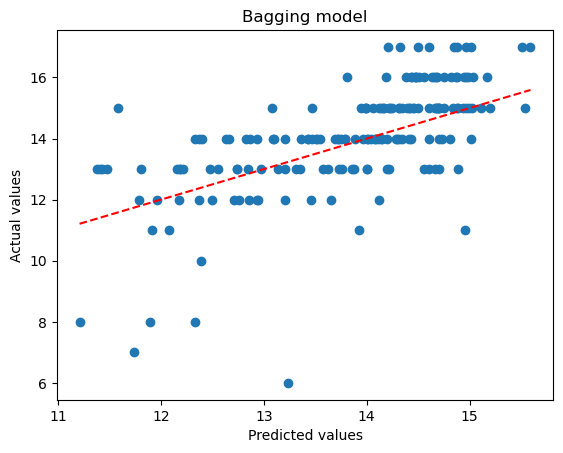

In [370]:
# plot predicted vs actual values
plt.scatter(y_pred_bag, y_test)
plt.plot([min(y_pred_bag), max(y_pred_bag)], [min(y_pred_bag), max(y_pred_bag)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Bagging model');

### RandomForest

In [644]:
#Building Random forest model using 30 features
Tree_reg_rf = RandomForestRegressor(max_features=30,random_state = 1)
Tree_reg_rf.fit(X_train,y_train)

#predict test data using random forest model
y_pred_rf = Tree_reg_rf.predict(X_test)
test_mse = ((y_test - y_pred_rf)**2).mean()
print("Mean squared error for the RandomForest with test set:",test_mse)

Mean squared error for the RandomForest with test set: 1.9135849162011174


In [646]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': Tree_reg_rf.feature_importances_})
importances = importances.sort_values(by= ['importance'], ascending = False).reset_index(drop=True)
importances.head(5)

feature_name  importance
0      EDUSCHGRD2    0.219511
1       EDUSKPCOM    0.047543
2  Overall_Health    0.038572
3     County_Type    0.038085
4            Race    0.032862

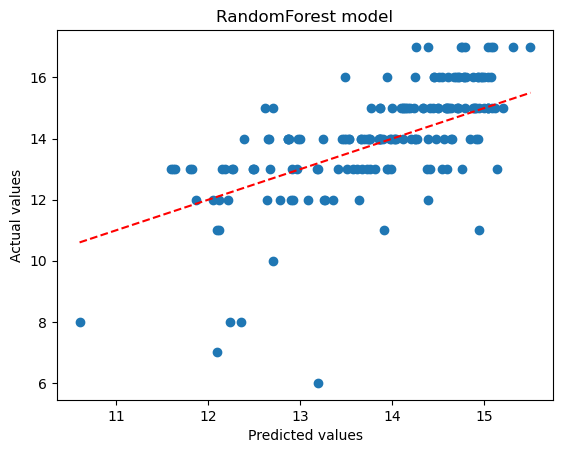

In [648]:
plt.scatter(y_pred_rf, y_test)
plt.plot([min(y_pred_rf), max(y_pred_rf)], [min(y_pred_rf), max(y_pred_rf)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('RandomForest model');

### Boosting

In [651]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.01, 0.05, 0.1],
}

# Create model
gb_model_reg = GradientBoostingRegressor(random_state=1)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(gb_model_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}


In [653]:
#Building boosting model with the best parameters
Tree_Bst_reg = GradientBoostingRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=4, random_state=1)
Tree_Bst_reg.fit(X_train,y_train)

#predict the test data using boosting model
y_pred_bag_reg = Tree_Bst_reg.predict(X_test)
test_mse = ((y_test - y_pred_bag_reg)**2).mean()
print("Mean squared error for the Boosting model with test set:",test_mse)

Mean squared error for the Boosting model with test set: 2.3852063644110193


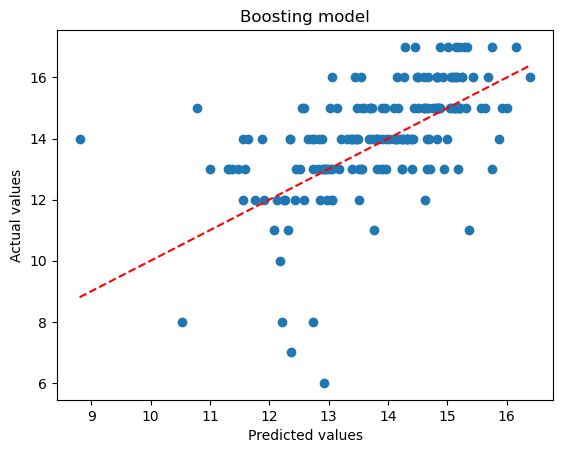

In [655]:
plt.scatter(y_pred_bag_reg, y_test)
plt.plot([min(y_pred_bag_reg), max(y_pred_bag_reg)], [min(y_pred_bag_reg), max(y_pred_bag_reg)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Boosting model');

Text(0.5, 1.0, 'Variable Importance plot for Boosting model')

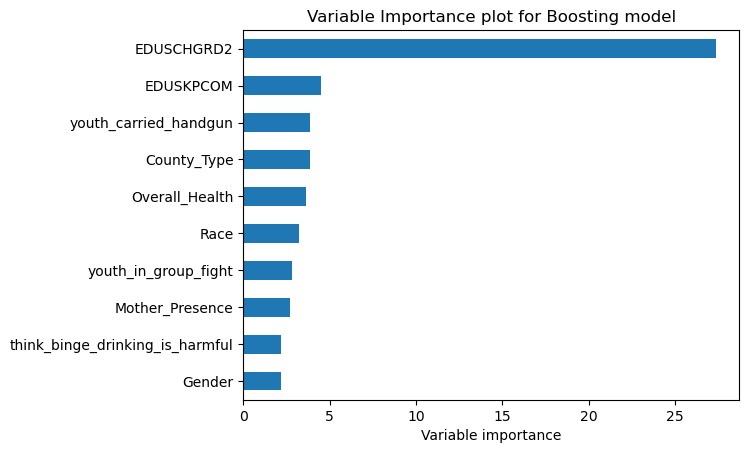

In [859]:
feature_importance = Tree_Bst_reg.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(ascending = True,inplace=False)
rel_imp.tail(10).T.plot(kind='barh')
plt.xlabel('Variable importance')
plt.title('Variable Importance plot for Boosting model')